In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import skimage
from scipy.ndimage.measurements import histogram
from skimage.filters.rank import entropy
from sklearn.cluster import KMeans
from scipy import ndimage

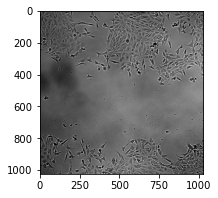

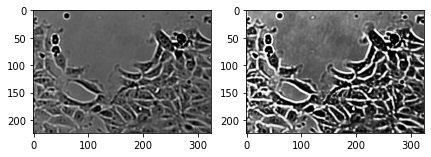

In [16]:
im = plt.imread('DIC_SN_15_L7_Sum00.tif')
plt.figure(figsize=(3,3))
plt.imshow(im,cmap='gray')

h = histogram(im,0,255,256)
hc = np.cumsum(h)/(im.shape[0]*im.shape[1])
    
im2d = hc[im]


plt.figure(figsize=(7,7))
plt.subplot(121)
plt.imshow(im[800:,700:],cmap='gray')
plt.subplot(122)
plt.imshow(im2d[800:,700:],cmap='gray')

In [17]:
#%%
#5.5.2 KIRSCH COMPASS KERNEL
#Este algoritmo detecta bordes en direcciones predeterminadas. La magnitud borde
# del operador de Kirsch se calcula con cada píxel como la máxima magnitud a través
#de todas las direcciones

#Es una matriz compuesta de 8 matrices 3x3
kir = np.zeros([8, 3, 3])
g1 = np.array([[5,5,5],[-3,0,-3],[-3,-3,-3]])
g2 = np.array([[5,5,-3],[5,0,-3],[-3,-3,-3]])
g3 = np.array([[5,-3,-3],[5,0,-3],[5,-3,-3]])
g4 = np.array([[-3,-3,-3],[5,0,-3],[5,5,-3]])
g5 = np.array([[-3,-3,-3],[-3,0,-3],[5,5,5]])
g6 = np.array([[-3,-3,-3],[-3,0,5],[-3,5,5]])
g7 = np.array([[-3,-3,5],[-3,0,5],[-3,-3,5]])
g8 = np.array([[-3, 5, 5],[-3,0,5],[-3,-3,-3]])

#Lo convoluciono todo
#La matriz enorme en la que voy a meter las imágenes convolucionadas, cada una con su filtro:
#(Cada imagen estará convolucionada )
convo_kirsch=np.zeros((8, im2d.shape[0], im2d.shape[1]))

convo_kirsch[0,:,:] = np.abs(ndimage.convolve(im2d, g1))
convo_kirsch[1,:,:] = np.abs(ndimage.convolve(im2d, g2))
convo_kirsch[2,:,:] = np.abs(ndimage.convolve(im2d, g3))
convo_kirsch[3,:,:] = np.abs(ndimage.convolve(im2d, g4))
convo_kirsch[4,:,:] = np.abs(ndimage.convolve(im2d, g5))
convo_kirsch[5,:,:] = np.abs(ndimage.convolve(im2d, g6))
convo_kirsch[6,:,:] = np.abs(ndimage.convolve(im2d, g7))
convo_kirsch[7,:,:] = np.abs(ndimage.convolve(im2d, g8))

im_kirsch = np.zeros((im2d.shape[0],im2d.shape[1]))

for ii in range(im2d.shape[0]):
    for jj in range(im2d.shape[1]):
        im_kirsch[ii, jj] = np.amax(convo_kirsch[0:8, ii, jj])

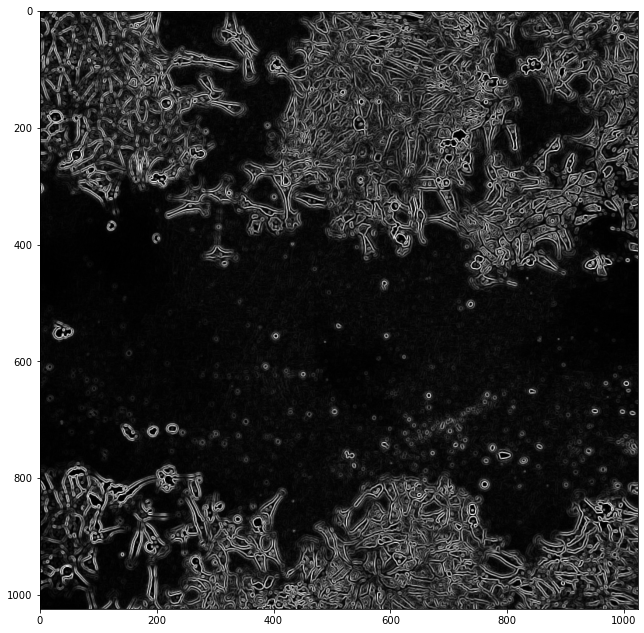

In [18]:
plt.figure(figsize=(11,11))
plt.imshow(im_kirsch, cmap='gray')

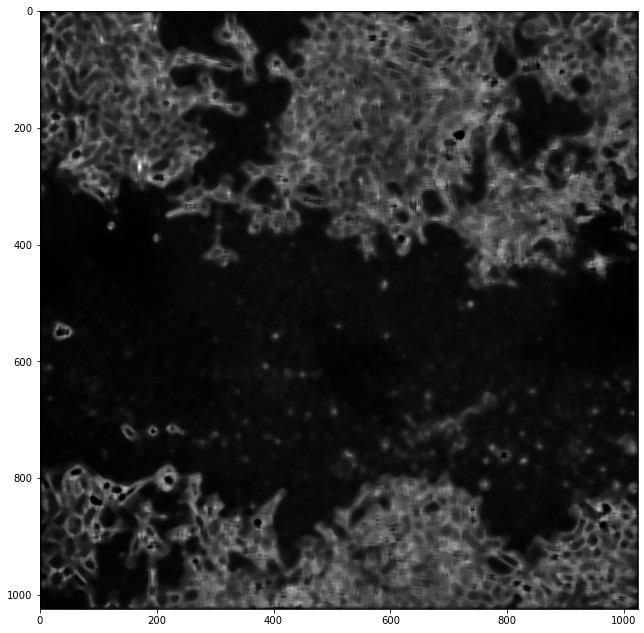

In [19]:
#MEDIAN THRESHOLD
# media = scipy.signal.medfilt(im, [mask size])
# ordena los valores de la imagen dentro de mask y coge el del medio
media = scipy.signal.medfilt2d(im_kirsch, kernel_size=[11,11])
plt.figure(figsize=(11,11))
plt.imshow(media,cmap='gray')

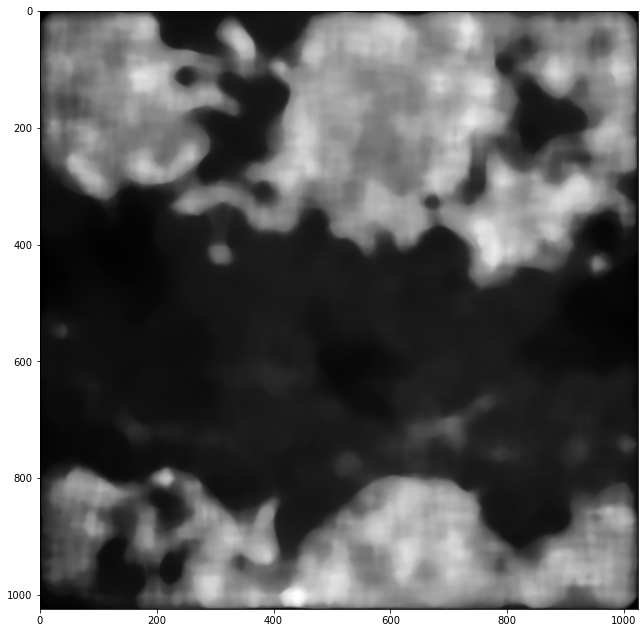

In [20]:
# second MEDIAN THRESHOLD
# media = scipy.signal.medfilt(im, [mask size])
# ordena los valores de la imagen dentro de mask y coge el del medio
media2 = scipy.signal.medfilt2d(media, kernel_size=[41,41])
plt.figure(figsize=(11,11))
plt.imshow(media2,cmap='gray')

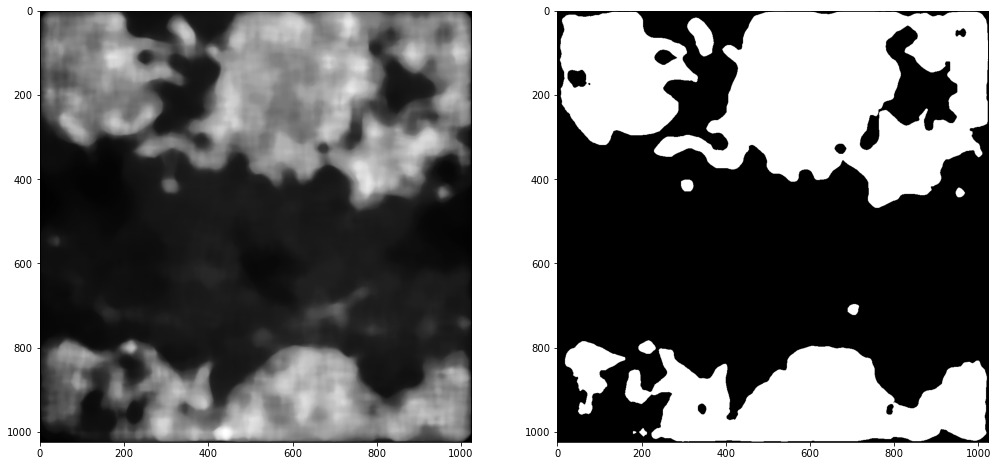

In [21]:
otsu = media2>skimage.filters.threshold_otsu(media2)
plt.figure(figsize=(17,17))
plt.subplot(121)
plt.imshow(media2,cmap='gray')
plt.subplot(122)
plt.imshow(otsu,cmap='gray')

## I found that Otsu threshold does not give good results. In order to build a general solution to the problem, I decided to apply K-means with k=7 and keep the largest cluster

In [24]:
dataK = media2.reshape(media2.shape[0]*media2.shape[1],1)
kmn = KMeans(n_clusters=7, init='k-means++',random_state=0).fit(dataK)
# a label (0 to 4) is assigned to e11ach sample (row)
labels = kmn.predict(dataK)

centroids = kmn.cluster_centers_
# from 1d-array to 2d-array

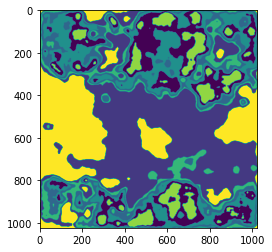

In [25]:
imRes = np.reshape(labels, [media2.shape[0], media2.shape[1]])
plt.imshow(imRes)

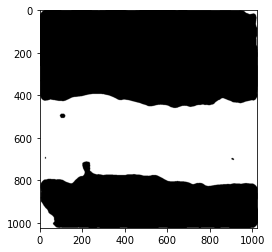

In [120]:
plt.imshow(imRes==2,cmap='gray')